# Feature Engineering:

This notebook details the generatino of features for the scraped data. 
Sections include:
1. Importing and Merging Data:
2. Generate Random Geometries for Tweets

## 1. Import and Merge Data:

In [34]:
# Import Libraries:

import pandas as pd

# ! pip install geopandas
# ! pip install descartes
import geopandas as gpd
import descartes

from shapely.geometry import Point
import random

# ! pip install geotext
# ! pip install geopy

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [35]:
# Read CSVs:

bc_before = pd.read_csv('../data/ne bomb cyclone data w:o location/ne_bomb_cyclone_before_tweets.csv')
bc_during = pd.read_csv('../data/ne bomb cyclone data w:o location/ne_bomb_cyclone_during_tweets.csv')
bc_after  = pd.read_csv('../data/ne bomb cyclone data w:o location/ne_bomb_cyclone_after_tweets.csv')

jan_before = pd.read_csv('../data/january/january-early_after_tweets.csv')
jan_during = pd.read_csv('../data/january/january-mid_during_tweets.csv')
jan_after = pd.read_csv('../data/january/january-end_before_tweets.csv')

jul_before = pd.read_csv('../data/july/july-early_after_tweets.csv')
jul_during = pd.read_csv('../data/july/july-mid_during_tweets.csv')
jul_after = pd.read_csv('../data/july/july-end_before_tweets.csv')

In [36]:
# Concat CSVs:

dfs = [bc_before, bc_during, bc_after, jan_before, jan_during, jan_after, jul_before, jul_during, jul_after]

In [37]:
# Concatenate all data into one DataFrame:

df = pd.concat(dfs, ignore_index=True)

In [38]:
df.shape

(18000, 11)

In [39]:
# Write merged CSV:

df.to_csv('../data/merged/merged_data_unclean.csv')

In [40]:
# Observe data:

df['Event'].value_counts()

ne_bomb_cyclone    6000
july-end           2000
july-mid           2000
january-early      2000
january-end        2000
july-early         2000
january-mid        2000
Name: Event, dtype: int64

## 2. Generate Random Synthetic Geometries for Tweets:

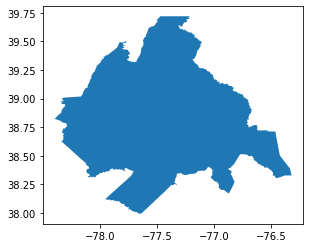

In [41]:
# Import Shapefile of WMA from Census Tiger/Line Shapefiles:

shp = gpd.read_file('../data/spatial_data/wma_gpkg.gpkg', layer = 'wma_gpkg')
shp.plot();

#### Random points were generated within the WMA shapefile using QGIS

In [48]:
# Import CSV of randomly generated points in WMA:

random_pts = pd.read_csv('../data/spatial_data/random_pts.csv')

In [49]:
# Observe the random points:

random_pts.head()

_wkt_geom     id     xcoord  \
0  Point (-77.58788778888725801 38.32415544020682...  17892 -77.587888   
1  Point (-76.48550640128354416 38.47508461690389...  17891 -76.485506   
2  Point (-77.41021456388132549 38.30670835924499...  17894 -77.410215   
3  Point (-77.79985279265937947 38.45514536776436...  17893 -77.799853   
4  Point (-77.83618103291209422 38.62109214538766...  17888 -77.836181   

      ycoord  
0  38.324155  
1  38.475085  
2  38.306708  
3  38.455145  
4  38.621092

In [50]:
# Ensure shape of points matches shape of tweets

random_pts.shape

(18000, 4)

## 3. Join Synthetic Gemotry to Tweets

In [51]:
# Append Random Points to Tweets:

tweets_geom = pd.concat([df, random_pts], axis=1)

In [53]:
# Observe merged data:

tweets_geom.head(2)

Unnamed: 0            Event   Stage  Query Date    Query Term  \
0           0  ne_bomb_cyclone  before  2019-10-15  power outage   
1           1  ne_bomb_cyclone  before  2019-10-15  power outage   

                    Id        Username  \
0  1183894397492043777      meekers999   
1  1183894362725289984  sharethiscrime   

                                                Text  \
0  Let's lose Govenor Gruesome in Cali please. He...   
1  Last time I checked, he's still a floofy baby ...   

                        Date Hashtags  Location  \
0  2019-10-14 23:56:34+00:00      NaN       NaN   
1  2019-10-14 23:56:26+00:00      NaN       NaN   

                                           _wkt_geom     id     xcoord  \
0  Point (-77.58788778888725801 38.32415544020682...  17892 -77.587888   
1  Point (-76.48550640128354416 38.47508461690389...  17891 -76.485506   

      ycoord  
0  38.324155  
1  38.475085

In [55]:
# Ensure consistent shape of merged data (18k rows):

tweets_geom.shape

(18000, 15)

## 4. Export Data with Geometry to CSV:

In [56]:
# Export to data folder:

tweets_geom.to_csv('../data/merged/tweets_geom_unclean.csv')